# Outranking algorithms

This notebook is dedicated to the use of outranking algorithms, including the different ELECTRE algorithms and Promethee algorithms.

In [1]:
%matplotlib notebook
%config Completer.use_jedi = False

## Electre algorithms

### Outranking problem formalization

In [2]:
from mcda.matrices import *
from mcda.relations import *
from mcda.scales import *
from mcda.outranking.electre import *

In [3]:
#Parameters 
alternatives = ["Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas"]
scales = {
    0: QuantitativeScale(1, 5),
    1: QuantitativeScale(1, 5),
    2: QuantitativeScale(1, 5),
    3: QuantitativeScale(1, 5),
    4: QuantitativeScale(1, 5),
    5: QuantitativeScale(1, 5),
    6: QuantitativeScale(1, 5),
}
dataset = PerformanceTable(
    [
        [4, 2, 1, 5, 2, 2, 4],
        [3, 5, 3, 5, 3, 3, 3],
        [3, 5, 3, 5, 3, 2, 2],
        [4, 2, 2, 5, 1, 1, 1],
        [4, 1, 3, 5, 4, 1, 5],
    ],
    alternatives=alternatives,
    scales=scales
)

### Electre I

In [4]:
W = {
    0: 0.780, 1: 1.180, 2: 1.570, 3: 3.140,
    4: 2.350, 5: 0.390, 6: 0.590}
c_hat = 0.75
d_hat = {0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}

In [5]:
electre1 = Electre1(dataset, W, c_hat, d_hat)

#### concordance matrix

In [6]:
electre1.concordance().data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                   1.000                0.451   
Opel Record 2000 LS              0.863                1.000   
Citroen Visa Super E             0.863                0.902   
VW Golf 1300 GLS                 0.667                0.392   
Citroen CX 2400 Pallas           0.843                0.843   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                         0.490             0.843   
Opel Record 2000 LS                    1.000             0.922   
Citroen Visa Super E                   1.000             0.922   
VW Golf 1300 GLS                       0.392             1.000   
Citroen CX 2400 Pallas                 0.843             0.882   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                           0.549  
Opel Record 2000 LS                      0.628  
Citroen Visa Super E                     0.628  
VW Golf 1300 GLS                         0.549  
Citroen CX 2400 Pallas                   1.000

In [7]:
dataset.scales[0] = QuantitativeScale(1, 5, preference_direction=MIN)
concordance_mat = electre1.concordance()
concordance_mat.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                   1.000                0.373   
Opel Record 2000 LS              0.941                1.000   
Citroen Visa Super E             0.941                0.902   
VW Golf 1300 GLS                 0.667                0.314   
Citroen CX 2400 Pallas           0.843                0.765   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                         0.412             0.843   
Opel Record 2000 LS                    1.000             1.000   
Citroen Visa Super E                   1.000             1.000   
VW Golf 1300 GLS                       0.314             1.000   
Citroen CX 2400 Pallas                 0.765             0.882   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                           0.549  
Opel Record 2000 LS                      0.706  
Citroen Visa Super E                     0.706  
VW Golf 1300 GLS                         0.549  
Citroen CX 2400 Pallas                   1.000

#### discordance matrix

In [8]:
discordance_mat = electre1.discordance()
discordance_mat.criteria_matrices[0].data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       0                    1   
Opel Record 2000 LS                  0                    0   
Citroen Visa Super E                 0                    0   
VW Golf 1300 GLS                     0                    1   
Citroen CX 2400 Pallas               0                    1   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             1                 0   
Opel Record 2000 LS                        0                 0   
Citroen Visa Super E                       0                 0   
VW Golf 1300 GLS                           1                 0   
Citroen CX 2400 Pallas                     1                 0   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          0  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       0

#### outranking matrix

In [9]:
outranking_matrix = electre1.outranking(concordance_mat, discordance_mat)
outranking_matrix.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    0   
Opel Record 2000 LS                  1                    1   
Citroen Visa Super E                 1                    1   
VW Golf 1300 GLS                     0                    0   
Citroen CX 2400 Pallas               1                    0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     0                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          0  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       1

In [10]:
PreferenceStructure.from_outranking_matrix(outranking_matrix)

PreferenceStructure([PreferenceRelation(Peugeot 505 GR, VW Golf 1300 GLS), IndifferenceRelation(Opel Record 2000 LS, Citroen Visa Super E), IncomparableRelation(Opel Record 2000 LS, Citroen CX 2400 Pallas), PreferenceRelation(Opel Record 2000 LS, Peugeot 505 GR), IncomparableRelation(Citroen Visa Super E, Citroen CX 2400 Pallas), PreferenceRelation(Opel Record 2000 LS, VW Golf 1300 GLS), PreferenceRelation(Citroen CX 2400 Pallas, VW Golf 1300 GLS), PreferenceRelation(Citroen CX 2400 Pallas, Peugeot 505 GR), PreferenceRelation(Citroen Visa Super E, Peugeot 505 GR), PreferenceRelation(Citroen Visa Super E, VW Golf 1300 GLS)])

In [11]:
PreferenceStructure.from_outranking_matrix(outranking_matrix).outranking_matrix.data

Citroen CX 2400 Pallas  Citroen Visa Super E  \
Citroen CX 2400 Pallas                       1                     0   
Citroen Visa Super E                         0                     1   
Opel Record 2000 LS                          0                     1   
Peugeot 505 GR                               0                     0   
VW Golf 1300 GLS                             0                     0   

                        Opel Record 2000 LS  Peugeot 505 GR  VW Golf 1300 GLS  
Citroen CX 2400 Pallas                    0               1                 1  
Citroen Visa Super E                      1               1                 1  
Opel Record 2000 LS                       1               1                 1  
Peugeot 505 GR                            0               1                 1  
VW Golf 1300 GLS                          0               0                 1

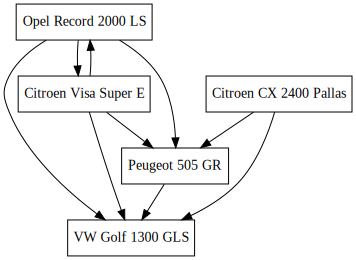

In [12]:
outranking_matrix.plot()

We can also construct the outranking matrix using the method `construct`:

In [13]:
outranking_matrix = electre1.construct()

#### Exploitation

In [14]:
electre1.exploit(outranking_matrix)

['Peugeot 505 GR',
 'Opel Record 2000 LS',
 'Citroen Visa Super E',
 'VW Golf 1300 GLS',
 'Citroen CX 2400 Pallas']

In [15]:
electre1.exploit(outranking_matrix, cycle_reduction=True)

['Citroen Visa Super E', 'Citroen CX 2400 Pallas', 'Opel Record 2000 LS']

In [16]:
electre1.exploit(
    outranking_matrix, cycle_reduction=True, transitivity=True
)

['Citroen Visa Super E', 'Citroen CX 2400 Pallas', 'Opel Record 2000 LS']

In [17]:
electre1.select(
    cycle_reduction=True, transitivity=True
)

['Citroen Visa Super E', 'Citroen CX 2400 Pallas', 'Opel Record 2000 LS']

### Electre II

#### Init 

In [18]:
#Parameters 
alternatives = [
    "Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas"
]
scales = {
    0: QuantitativeScale(1, 5),
    1: QuantitativeScale(1, 5),
    2: QuantitativeScale(1, 5),
    3: QuantitativeScale(1, 5),
    4: QuantitativeScale(1, 5),
    5: QuantitativeScale(1, 5),
    6: QuantitativeScale(1, 5),
}
dataset = PerformanceTable([
        [1, 2, 1, 5, 2, 2, 4],  # a1
        [3, 5, 3, 5, 3, 3, 3],  # a2
        [3, 5, 3, 5, 3, 2, 2],  # a3
        [1, 2, 2, 5, 1, 1, 1],  # a4
        [1, 1, 3, 5, 4, 1, 5],  # a5
    ], alternatives=alternatives, scales=scales
)
W = {
    0: 0.780, 1: 1.180, 2: 1.570, 3: 3.140,
    4: 2.350, 5: 0.390, 6: 0.590
}

electre2 = Electre2(
    dataset, W, 0.65, 0.85,
    {c: 2 for c in dataset.criteria},
    {c: 1 for c in dataset.criteria}
)

#### concordance and discordance
First let's compute the concordance and discordance as it done in Electre 1

In [19]:
concordance_matrix = electre2.concordance()
discordance_matrix = electre2.discordance()
print(concordance_matrix.data)
discordance_matrix.criteria_matrices[0].data

                        Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                   1.000                0.373   
Opel Record 2000 LS              0.941                1.000   
Citroen Visa Super E             0.941                0.902   
VW Golf 1300 GLS                 0.667                0.314   
Citroen CX 2400 Pallas           0.843                0.765   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                         0.412             0.843   
Opel Record 2000 LS                    1.000             1.000   
Citroen Visa Super E                   1.000             1.000   
VW Golf 1300 GLS                       0.314             1.000   
Citroen CX 2400 Pallas                 0.765             0.882   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                           0.549  
Opel Record 2000 LS                      0.706  
Citroen Visa Super E                     0.706  
VW Golf 1300 GLS            

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       0                    2   
Opel Record 2000 LS                  0                    0   
Citroen Visa Super E                 0                    0   
VW Golf 1300 GLS                     0                    2   
Citroen CX 2400 Pallas               0                    2   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             2                 0   
Opel Record 2000 LS                        0                 0   
Citroen Visa Super E                       0                 0   
VW Golf 1300 GLS                           2                 0   
Citroen CX 2400 Pallas                     2                 0   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          0  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       0

In [20]:
strong_outranking = electre2.outranking(
    concordance_matrix,
    discordance_matrix
)
strong_outranking.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    0   
Opel Record 2000 LS                  1                    1   
Citroen Visa Super E                 0                    0   
VW Golf 1300 GLS                     0                    0   
Citroen CX 2400 Pallas               0                    0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 0   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     0                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          0  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       1

In [21]:
weak_outranking = electre2.outranking(
    concordance_matrix,
    discordance_matrix,
    strong=False
)
weak_outranking.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    0   
Opel Record 2000 LS                  1                    1   
Citroen Visa Super E                 1                    0   
VW Golf 1300 GLS                     0                    0   
Citroen CX 2400 Pallas               1                    0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     0                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          0  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       1

You can also return both matrices directly:

In [22]:
strong_outranking, weak_outranking = electre2.construct()

#### Distillation
Now let's process the ascending and descending distallation

In [23]:
ascending_distillate = electre2.distillation(
    strong_outranking,
    weak_outranking,
    ascending=True
)
descending_distillate = electre2.distillation(
    strong_outranking,
    weak_outranking
)

In [24]:
ascending_distillate.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    0   
Opel Record 2000 LS                  1                    1   
Citroen Visa Super E                 1                    0   
VW Golf 1300 GLS                     0                    0   
Citroen CX 2400 Pallas               1                    0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          1  
Citroen Visa Super E                         1  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       1

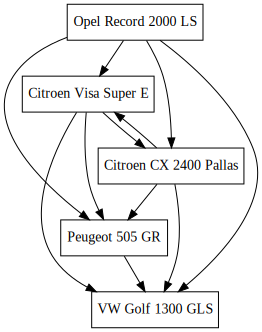

In [25]:
ascending_distillate.plot()

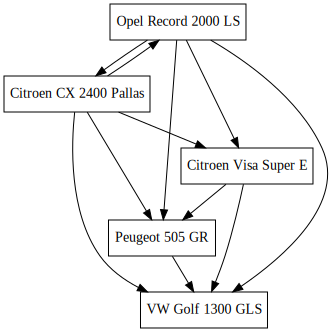

In [26]:
descending_distillate.plot()

#### final ranking
Finally, we can compute and print the final ranking

In [27]:
final_rank = ascending_distillate & descending_distillate
final_rank.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    0   
Opel Record 2000 LS                  1                    1   
Citroen Visa Super E                 1                    0   
VW Golf 1300 GLS                     0                    0   
Citroen CX 2400 Pallas               1                    0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          1  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       1

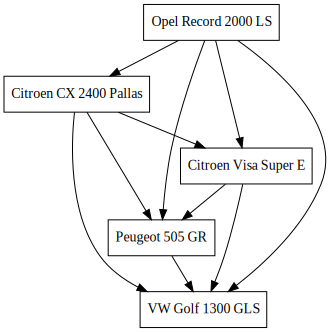

In [28]:
final_rank.plot()

We could also directly call the `exploit` method:

In [29]:
final_rank = electre2.exploit((strong_outranking, weak_outranking))

#### Direct methods
We can also compute directly the electre II algorithm if nothing needs to be changed. Besides it's possible to reduce the matrix in term of preferences for a proper graph.

In [30]:
final_rank = electre2.rank()
final_rank.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    0   
Opel Record 2000 LS                  1                    1   
Citroen Visa Super E                 1                    0   
VW Golf 1300 GLS                     0                    0   
Citroen CX 2400 Pallas               1                    0   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   

                        Citroen CX 2400 Pallas  
Peugeot 505 GR                               0  
Opel Record 2000 LS                          1  
Citroen Visa Super E                         0  
VW Golf 1300 GLS                             0  
Citroen CX 2400 Pallas                       1

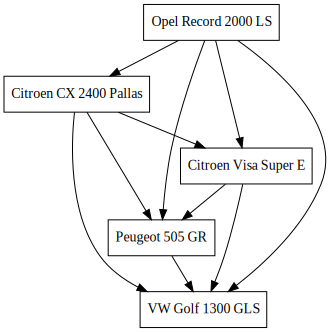

In [31]:
final_rank.plot()

### Electre III

#### init

In [32]:
alternatives = [
    "Peugeot 505 GR",
    "Opel Record 2000 LS",
    "Citroen Visa Super E",
    "VW Golf 1300 GLS",
    "Citroen CX 2400 Pallas",
    "Renault Scenic"
]
scales = {
    0: QuantitativeScale(7, 10),
    1: QuantitativeScale(7, 10),
    2: QuantitativeScale(5, 9),
    3: QuantitativeScale(6, 9),
}
dataset = PerformanceTable(
    [
        [8.84, 8.79, 6.43, 6.95],
        [8.57, 8.51, 5.47, 6.91],
        [7.76, 7.75, 5.34, 8.76],
        [7.97, 9.12, 5.93, 8.09],
        [9.03, 8.97, 8.19, 8.10],
        [7.41, 7.87, 6.77, 7.23],
    ], 
    alternatives=alternatives, scales=scales
)
W = {0: 9.00, 1: 8.24, 2: 5.98, 3: 8.48}
P = {0: 0.50, 1: 0.50, 2: 0.50, 3: 0.50}
I = {0: 0.30, 1: 0.30, 2: 0.30, 3: 0.30}
V = {0: 0.70, 1: 0.70, 2: 0.70, 3: 0.70}

electre3 = Electre3(dataset, W, I, P, V)

#### concordance

In [33]:
electre3.concordance().data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                1.000000             1.000000   
Opel Record 2000 LS           0.811356             1.000000   
Citroen Visa Super E          0.267508             0.456151   
VW Golf 1300 GLS              0.527445             0.716088   
Citroen CX 2400 Pallas        1.000000             1.000000   
Renault Scenic                0.456151             0.456151   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                      0.732492          0.693502   
Opel Record 2000 LS                 0.732492          0.321640   
Citroen Visa Super E                1.000000          0.551420   
VW Golf 1300 GLS                    0.732492          1.000000   
Citroen CX 2400 Pallas              0.732492          1.000000   
Renault Scenic                      0.661514          0.188644   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                        0.543849        0.962271  
Opel Record 2000 LS                   0.108770        0.784606  
Citroen Visa Super E                  0.267508        0.811356  
VW Golf 1300 GLS                      0.527445        0.811356  
Citroen CX 2400 Pallas                1.000000        1.000000  
Renault Scenic                        0.000000        1.000000

#### discordance

In [34]:
d = electre3.discordance().data

In [35]:
for i in d.index:
    for j in d.columns:
        print(d.loc[i, j].tolist())

[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 0, 1]
[0, 0, 1, 1]
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 1]
[0.0, 0.5499999999999973, 0.0, 1.0]
[0, 0, 1, 1]
[0, 0, 1, 0]
[1, 1, 1, 0]
[1, 1, 0, 0]
[0, 0, 0, 0]
[0.0, 1.0, 0.4499999999999994, 0.0]
[1, 1, 1, 0]
[0, 0, 1, 0]
[1, 0, 0, 0]
[0.5000000000000028, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.8499999999999999]
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.8000000000000009]
[0, 0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0]
[1, 1, 0, 0]
[1.0, 0.6999999999999985, 0.0, 0.0]
[0, 0, 0, 1]
[0.2999999999999981, 1.0, 0.0, 1.0]
[1, 1, 1, 1]
[0, 0, 0, 0]


#### credibility

In [36]:
credibility = electre3.construct()
credibility.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                     1.0             1.000000   
Opel Record 2000 LS                0.0             1.000000   
Citroen Visa Super E               0.0             0.000000   
VW Golf 1300 GLS                   0.0             0.716088   
Citroen CX 2400 Pallas             1.0             1.000000   
Renault Scenic                     0.0             0.000000   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                      0.000000               0.0   
Opel Record 2000 LS                 0.000000               0.0   
Citroen Visa Super E                1.000000               0.0   
VW Golf 1300 GLS                    0.410731               1.0   
Citroen CX 2400 Pallas              0.547642               1.0   
Renault Scenic                      0.000000               0.0   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                             0.0        0.962271  
Opel Record 2000 LS                        0.0        0.000000  
Citroen Visa Super E                       0.0        0.000000  
VW Golf 1300 GLS                           0.0        0.000000  
Citroen CX 2400 Pallas                     1.0        1.000000  
Renault Scenic                             0.0        1.000000

#### qualification

In [37]:
qual = electre3.qualification(credibility)
qual

Peugeot 505 GR            1
Opel Record 2000 LS      -2
Citroen Visa Super E      0
VW Golf 1300 GLS         -1
Citroen CX 2400 Pallas    4
Renault Scenic           -2
dtype: int64

#### Distillation

In [38]:
descending_distillate = electre3.distillation(
    credibility,
)
descending_distillate.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    1   
Opel Record 2000 LS                  0                    1   
Citroen Visa Super E                 0                    1   
VW Golf 1300 GLS                     0                    1   
Citroen CX 2400 Pallas               1                    1   
Renault Scenic                       0                    1   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             1                 1   
Opel Record 2000 LS                        1                 1   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           1                 1   
Citroen CX 2400 Pallas                     1                 1   
Renault Scenic                             1                 1   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                               0               1  
Opel Record 2000 LS                          0               1  
Citroen Visa Super E                         0               1  
VW Golf 1300 GLS                             0               1  
Citroen CX 2400 Pallas                       1               1  
Renault Scenic                               0               1

In [39]:
ascending_distillate = electre3.distillation(
    credibility,
    ascending=True
)
ascending_distillate.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    1   
Opel Record 2000 LS                  0                    1   
Citroen Visa Super E                 1                    1   
VW Golf 1300 GLS                     1                    1   
Citroen CX 2400 Pallas               1                    1   
Renault Scenic                       0                    1   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        0                 0   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   
Renault Scenic                             0                 0   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                               0               1  
Opel Record 2000 LS                          0               1  
Citroen Visa Super E                         1               1  
VW Golf 1300 GLS                             0               1  
Citroen CX 2400 Pallas                       1               1  
Renault Scenic                               0               1

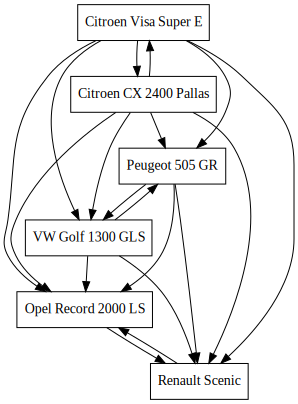

In [40]:
ascending_distillate.plot()

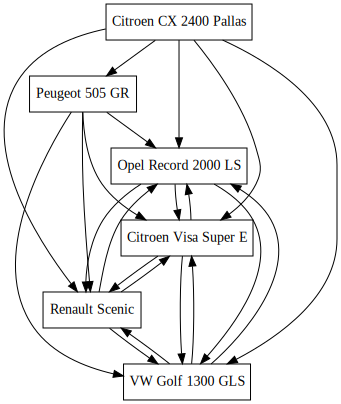

In [41]:
descending_distillate.plot()

#### Final ranking 

In [42]:
ranking = ascending_distillate & descending_distillate
ranking.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    1   
Opel Record 2000 LS                  0                    1   
Citroen Visa Super E                 0                    1   
VW Golf 1300 GLS                     0                    1   
Citroen CX 2400 Pallas               1                    1   
Renault Scenic                       0                    1   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        0                 0   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   
Renault Scenic                             0                 0   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                               0               1  
Opel Record 2000 LS                          0               1  
Citroen Visa Super E                         0               1  
VW Golf 1300 GLS                             0               1  
Citroen CX 2400 Pallas                       1               1  
Renault Scenic                               0               1

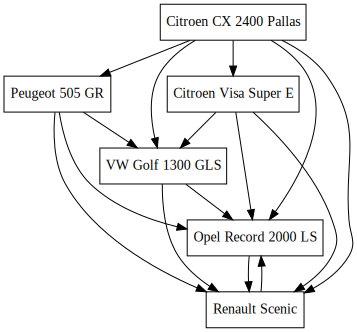

In [43]:
ranking.plot()

You can also call the `exploit` method directly:

In [44]:
ranking = electre3.exploit(credibility)

#### Direct methods
We can also compute directly the electre III algorithm if nothing needs to be change. Besides it's possible to reduce the matrix in term of preferences for a proper graph.

In [45]:
final_rank = electre3.rank()
final_rank.data

Peugeot 505 GR  Opel Record 2000 LS  \
Peugeot 505 GR                       1                    1   
Opel Record 2000 LS                  0                    1   
Citroen Visa Super E                 0                    1   
VW Golf 1300 GLS                     0                    1   
Citroen CX 2400 Pallas               1                    1   
Renault Scenic                       0                    1   

                        Citroen Visa Super E  VW Golf 1300 GLS  \
Peugeot 505 GR                             0                 1   
Opel Record 2000 LS                        0                 0   
Citroen Visa Super E                       1                 1   
VW Golf 1300 GLS                           0                 1   
Citroen CX 2400 Pallas                     1                 1   
Renault Scenic                             0                 0   

                        Citroen CX 2400 Pallas  Renault Scenic  
Peugeot 505 GR                               0               1  
Opel Record 2000 LS                          0               1  
Citroen Visa Super E                         0               1  
VW Golf 1300 GLS                             0               1  
Citroen CX 2400 Pallas                       1               1  
Renault Scenic                               0               1

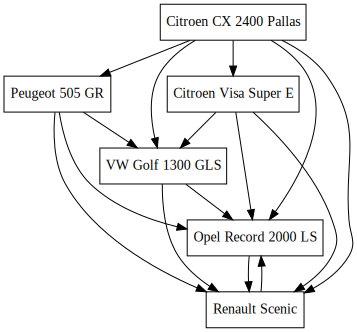

In [46]:
final_rank.plot()

### Electre TRI

#### Init

In [47]:
scales = {
    0: QuantitativeScale(0, 1),
    1: QuantitativeScale(3, 4),
    2: QuantitativeScale(1, 2),
    3: QuantitativeScale(0, 1),
    4: QuantitativeScale(30, 100),
}
dataset = PerformanceTable([
    [0.720, 3.560, 1.340, 0.62, 44.340],
    [0.8, 3.940, 1.430, 0.74, 36.360],
    [0.760, 3.630, 1.380, 0.89, 48.750],
    [0.780, 3.740, 1.450, 0.72, 42.130],
    [0.740, 3.540, 1.370, 0.73, 36.990],
    [0.690, 3.740, 1.450, 0.84, 42.430],
    [0.7, 3.280, 1.280, 0.83, 47.430],
    [0.860, 3.370, 1.150, 0.8, 80.790],
], scales=scales)
w = {0: 30, 1: 30, 2: 20, 3: 10, 4: 10}
P = {0: 0.05, 1: 0.1, 2: 0.05, 3: 0.1, 4: 8}
I = {0: 0.02, 1: 0.05, 2: 0.02, 3: 0.05, 4: 2}
V = {0: 0.15, 1: 0.6, 2: 0.25, 3: 0.25, 4: 15}
profiles = PerformanceTable(
    [
        [0.750, 3.500, 1.300, 0.730, 42.00],
        [0.800, 3.700, 1.370, 0.790, 43.000],
    ],
    alternatives=["p1", "p2"],
    scales=scales
)
categories = ["Low", "Medium", "High"]

electre_tri = ElectreTri(
    dataset, W, profiles, I, P, V, lambda_=0.7, categories=categories
)

#### Construction step

In [48]:
credibility = electre_tri.construct()
credibility.data

0         1         2         3         4         5         6    7  \
0   1.000000  0.000000  0.000000  0.000000  0.669611  0.077514  0.730189  0.0   
1   1.000000  1.000000  0.732492  1.000000  1.000000  0.732492  0.785994  0.0   
2   1.000000  0.329298  1.000000  0.551420  1.000000  0.551420  1.000000  0.0   
3   1.000000  0.740063  0.732492  1.000000  1.000000  0.732492  0.732492  0.0   
4   1.000000  0.146081  0.510641  0.362145  1.000000  0.283912  0.732492  0.0   
5   0.905363  0.335499  0.716088  0.716088  0.716088  1.000000  1.000000  0.0   
6   0.551420  0.000000  0.129903  0.053363  0.362145  0.306916  1.000000  0.0   
7   0.368776  0.000000  0.050924  0.000000  0.184388  0.000000  0.811356  1.0   
p1  0.822250  0.095726  0.237885  0.420441  0.811356  0.198238  0.732492  0.0   
p2  1.000000  0.551420  0.732492  0.811356  1.000000  0.811356  1.000000  0.0   

          p1        p2  
0   0.637855  0.061431  
1   1.000000  1.000000  
2   1.000000  0.706751  
3   1.000000  0.892997  
4   1.000000  0.402650  
5   0.716088  0.716088  
6   0.456151  0.089744  
7   0.551420  0.184388  
p1  1.000000  0.214006  
p2  1.000000  1.000000

#### Optimistic Procedure

In [49]:
electre_tri.exploit(
    credibility
).data

0       Low
1      High
2      High
3      High
4    Medium
5      High
6       Low
7      High
dtype: object

#### Pessimistic Procedure

In [50]:
electre_tri.exploit(
    credibility,
    pessimistic=True
).data

0       Low
1      High
2      High
3      High
4    Medium
5      High
6       Low
7       Low
dtype: object

#### Direct method

In [51]:
electre_tri.assign().data

0       Low
1      High
2      High
3      High
4    Medium
5      High
6       Low
7      High
dtype: object

In [52]:
electre_tri.assign(pessimistic=True).data

0       Low
1      High
2      High
3      High
4    Medium
5      High
6       Low
7       Low
dtype: object

## Promethee algorithms

### Outranking problem formalization

In [53]:
from mcda import PerformanceTable
from mcda.functions import UShapeFunction, VShapeFunction, LevelFunction, GaussianFunction
from mcda.outranking.promethee import *
from mcda.scales import *

In [54]:
action_names = ['a1', 'a2', 'a3', 'a4', 'a5']

scales = {
    0: QuantitativeScale(-5, 5, MAX),
    1: QuantitativeScale(-5, 5, MAX),
    2: QuantitativeScale(-5, 5, MAX),
    3: QuantitativeScale(-5, 5, MAX),
    4: QuantitativeScale(-5, 5, MAX),
    5: QuantitativeScale(-5, 5, MAX),
}

dataset = PerformanceTable([
    [1, 2, -1, 5, 2, 2],  # a1
    [3, 5, 3, -5, 3, 3],  # a2
    [3, -5, 3, 4, 3, 2],  # a3
    [2, -2, 2, 5, 1, 1],  # a4
    [3, 5, 3, -5, 3, 3],  # a5
], scales=scales, alternatives=action_names)

### Promethee I

In [55]:
preference_func_list = {
    0: VShapeFunction(p=1),
    1: VShapeFunction(p=4),
    2: VShapeFunction(p=3),
    3: VShapeFunction(p=1),
    4: VShapeFunction(p=2),
    5: VShapeFunction(p=2)
}
W = {0: 0.5, 1: 3, 2: 1.5, 3: 0.2, 4: 2, 5: 1}

In [56]:
promethee1 = Promethee1(dataset, W, preference_func_list)

In [57]:
res = promethee1.rank()
res

PreferenceStructure([PreferenceRelation(a2, a1), PreferenceRelation(a5, a1), PreferenceRelation(a3, a4), PreferenceRelation(a2, a3), PreferenceRelation(a5, a3), IncomparableRelation(a1, a3), PreferenceRelation(a2, a4), PreferenceRelation(a5, a4), PreferenceRelation(a1, a4), IndifferenceRelation(a2, a5)])

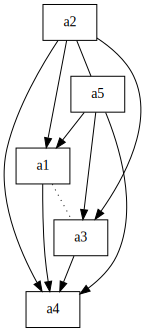

In [58]:
res.plot()

### Promethee II

In [59]:
promethee2 = Promethee2(dataset, W, preference_func_list)

In [60]:
res = promethee2.rank()
res.data

a1   -1.024390
a2    1.908537
a3   -0.701220
a4   -2.091463
a5    1.908537
dtype: float64

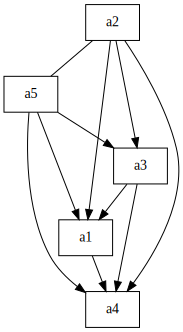

In [61]:
PreferenceStructure.from_ranking(res).plot()

### Promethee GAIA

In [62]:
gaia = PrometheeGaia(dataset, W, preference_func_list)

<IPython.core.display.Javascript object>


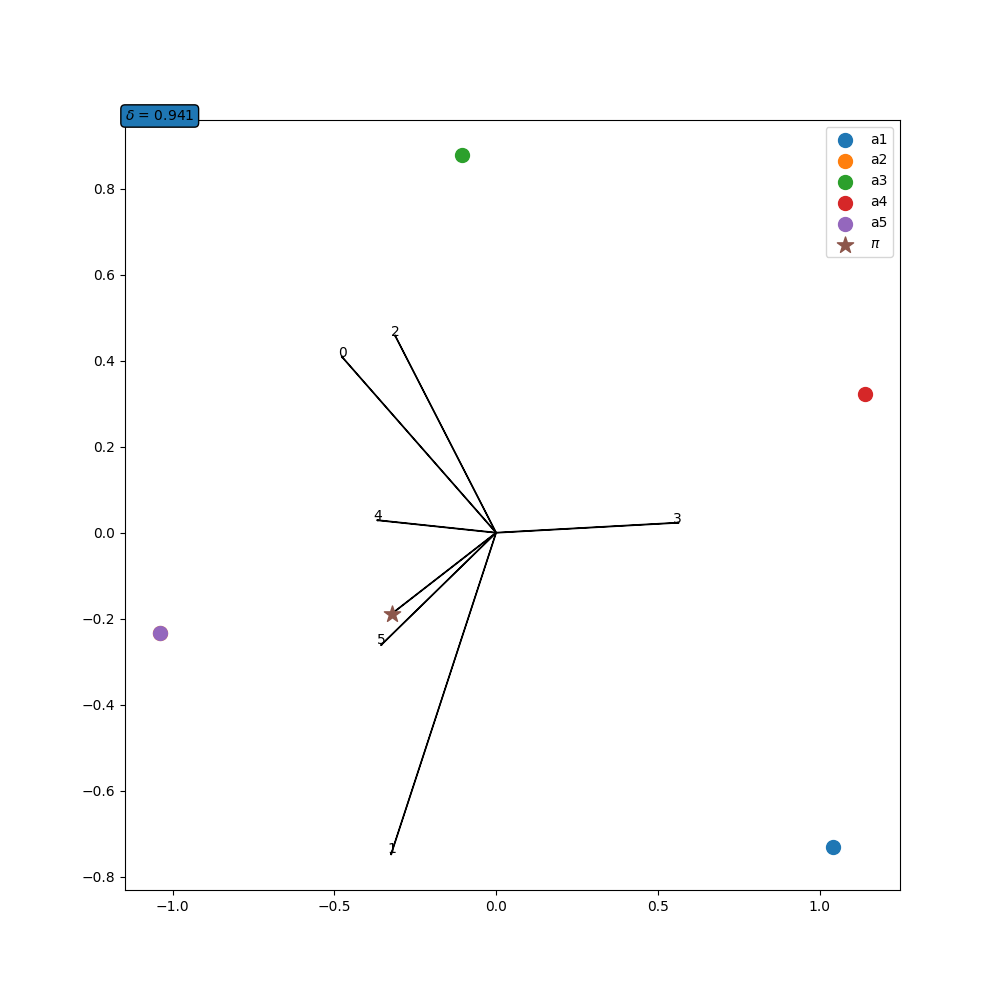

In [63]:
gaia.plot()

## SRMP

In [64]:
from mcda import PerformanceTable
from mcda.scales import *
from mcda.outranking.srmp import *
from mcda.relations import PreferenceStructure

In [65]:
alternatives = ["Fiat 500", "Peugeot 309", "Renault Clio", "Opel Astra", "Honda Civic", "Toyota Corolla"]
criteria = ["cost", "fuel consumption", "comfort", "color", "range"]
scale1 = QuantitativeScale(6000, 20000, preference_direction=MIN)
scale2 = QuantitativeScale(4, 6, preference_direction=MIN)
scale3 = QualitativeScale({"*": 1, "**": 2, "***": 3, "****": 4})
scale4 = QualitativeScale({"red": 1, "blue": 2, "black": 3, "grey": 4}, preference_direction=MIN)
scale5 = QuantitativeScale(400, 1000)
scales = {
    criteria[0]: scale1,
    criteria[1]: scale2,
    criteria[2]: scale3,
    criteria[3]: scale4,
    criteria[4]: scale5
}
performance_table = PerformanceTable(
    [
        [9500, 4.2, "**", "blue", 450],
        [15600, 4.5, "****", "black", 900],
        [6800, 4.1, "***", "grey", 700],
        [10200, 5.6, "****", "black", 850],
        [8100, 5.2, "***", "red", 750],
        [12000, 4.9, "****", "grey", 850]
    ],
    alternatives=alternatives,
    criteria=criteria,
    scales=scales
)

In [66]:
criteria_weights = {
    criteria[0]: 1,
    criteria[1]: 2,
    criteria[2]: 3,
    criteria[3]: 2,
    criteria[4]: 4
}

profiles = PerformanceTable(
    [
        [15000, 5.5, "**", "grey", 500],
        [10000, 5, "***", "black", 700],
        [7000, 4.5, "****", "blue", 900],
    ],
    criteria=criteria,
    scales=scales
)

lexicographic_order = [2, 0, 1]
srmp = SRMP(performance_table, criteria_weights, profiles, lexicographic_order)

### Preference relations

In [67]:
preference_matrices = srmp.construct()
preference_matrices[0].data

Fiat 500  Peugeot 309  Renault Clio  Opel Astra  Honda Civic  \
Fiat 500               1            0             0           0            0   
Peugeot 309            1            1             0           1            0   
Renault Clio           1            1             1           1            1   
Opel Astra             1            0             0           1            0   
Honda Civic            1            1             1           1            1   
Toyota Corolla         1            1             1           1            1   

                Toyota Corolla  
Fiat 500                     0  
Peugeot 309                  0  
Renault Clio                 1  
Opel Astra                   0  
Honda Civic                  1  
Toyota Corolla               1

In [68]:
preference_matrices[1].data

Fiat 500  Peugeot 309  Renault Clio  Opel Astra  Honda Civic  \
Fiat 500               1            0             0           0            0   
Peugeot 309            1            1             1           1            1   
Renault Clio           1            0             1           1            1   
Opel Astra             1            0             0           1            0   
Honda Civic            1            0             1           1            1   
Toyota Corolla         1            0             0           1            0   

                Toyota Corolla  
Fiat 500                     0  
Peugeot 309                  1  
Renault Clio                 1  
Opel Astra                   1  
Honda Civic                  1  
Toyota Corolla               1

In [69]:
preference_matrices[2].data

Fiat 500  Peugeot 309  Renault Clio  Opel Astra  Honda Civic  \
Fiat 500               1            0             1           1            1   
Peugeot 309            1            1             1           1            1   
Renault Clio           0            0             1           1            1   
Opel Astra             0            0             1           1            1   
Honda Civic            0            0             0           0            1   
Toyota Corolla         0            0             1           1            1   

                Toyota Corolla  
Fiat 500                     1  
Peugeot 309                  1  
Renault Clio                 1  
Opel Astra                   1  
Honda Civic                  0  
Toyota Corolla               1

### Ranking

In [70]:
rank = srmp.exploit(
    preference_matrices,
)
rank.data

Fiat 500          2
Peugeot 309       1
Renault Clio      3
Opel Astra        5
Honda Civic       6
Toyota Corolla    4
dtype: int64

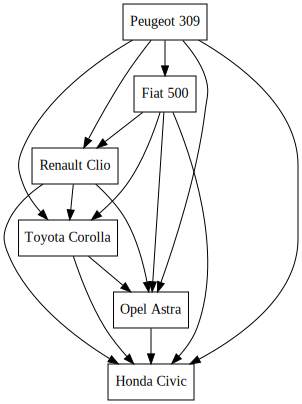

In [71]:
PreferenceStructure.from_ranking(rank).plot()

### Direct method

In [72]:
rank = srmp.rank()
rank.data

Fiat 500          2
Peugeot 309       1
Renault Clio      3
Opel Astra        5
Honda Civic       6
Toyota Corolla    4
dtype: int64

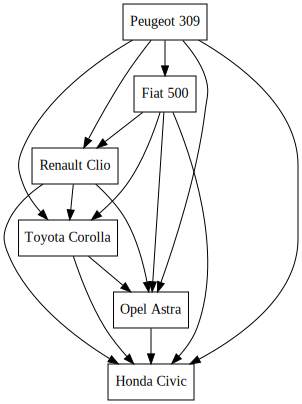

In [73]:
PreferenceStructure.from_ranking(rank).plot()

### Plot

#### Input data

<IPython.core.display.Javascript object>


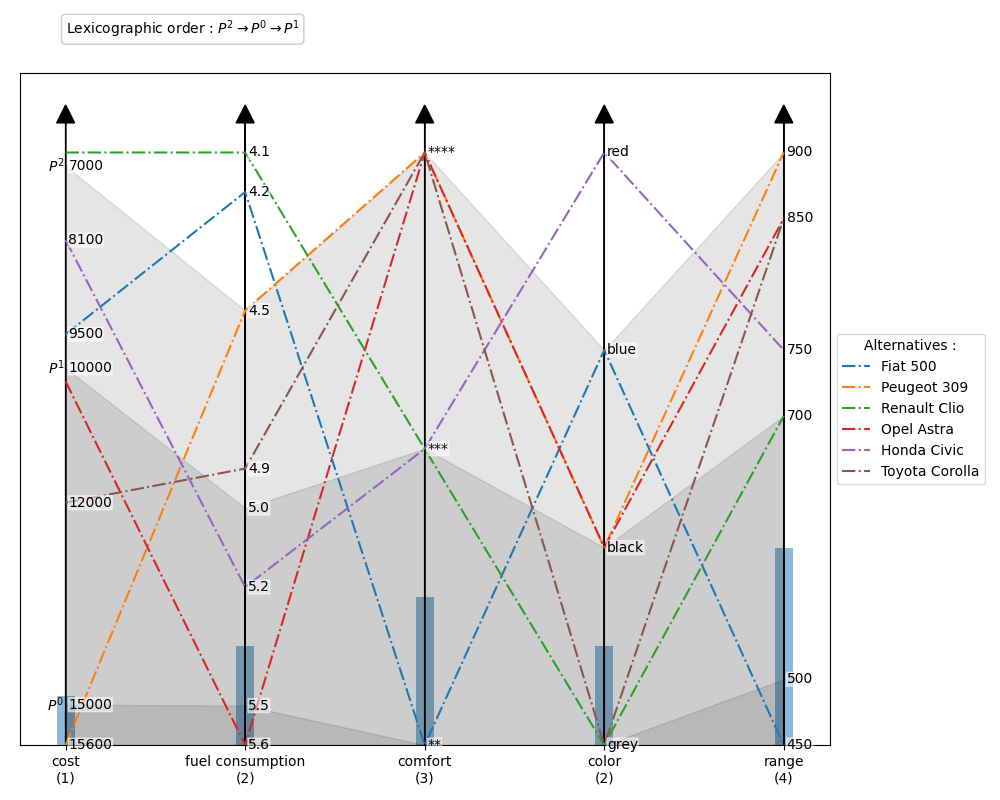

In [74]:
SRMP.plot_input_data(
    performance_table,
    srmp,
    xticklabels_tilted=False,
    annotations=True,
    scales_boundaries=False, # better readibility
    annotations_alpha=0.5,
    figsize=(10, 8),
)

#### Comparison between alternatives

<IPython.core.display.Javascript object>


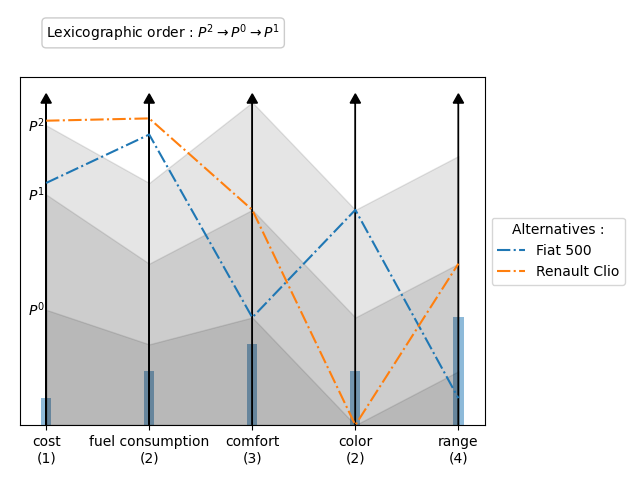

In [75]:
SRMP.plot_input_data(
    PerformanceTable(
        performance_table.data.loc[["Fiat 500", "Renault Clio"]],
        scales=scales
    ),
    srmp,
    xticklabels_tilted=False,
    annotations=False,
    scales_boundaries=True, # to keep the same boundaries between the comparisons
)

<IPython.core.display.Javascript object>


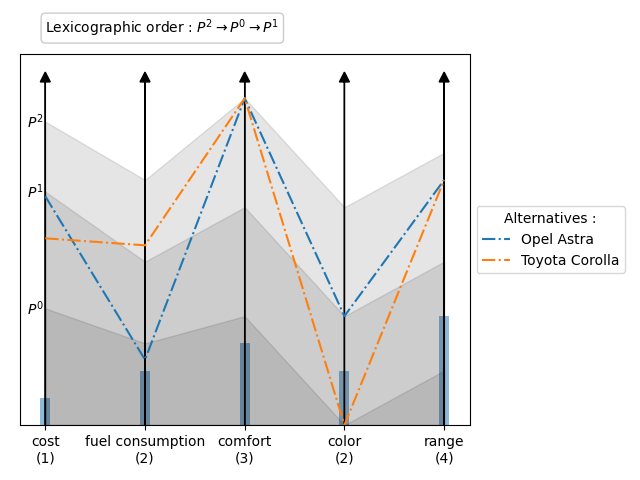

In [76]:
SRMP.plot_input_data(
    PerformanceTable(
        performance_table.data.loc[["Opel Astra", "Toyota Corolla"]],
        scales=scales
    ),
    srmp,
    xticklabels_tilted=False,
    annotations=False,
    scales_boundaries=True, # to keep the same boundaries between the comparisons
)

#### Concordance

<IPython.core.display.Javascript object>


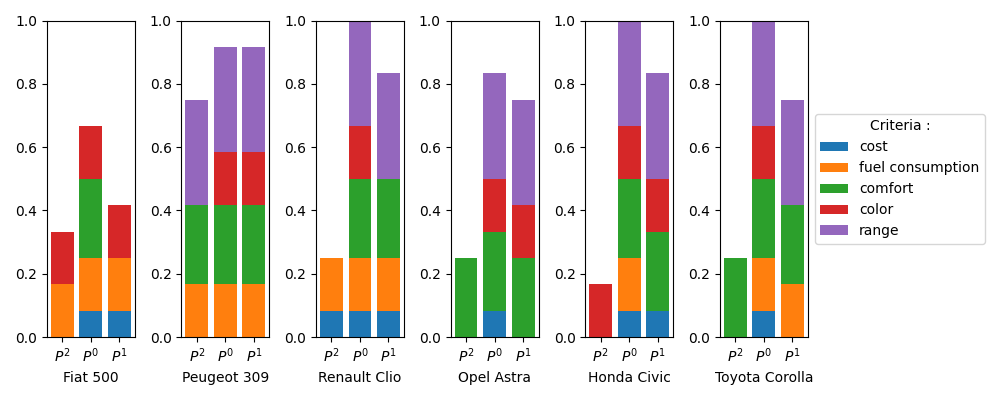

In [77]:
srmp.plot_concordance_index(
    performance_table,
    figsize=(10, 4),
    nrows=1,
    xlabels_tilted=False,
)

#### Progressive ranking

<IPython.core.display.Javascript object>


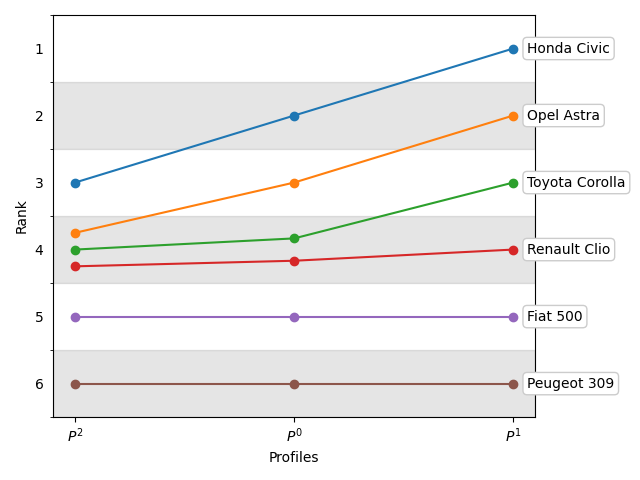

In [78]:
srmp.plot_progressive_ranking(
    performance_table
)

### SRMP Training

#### Providing relations

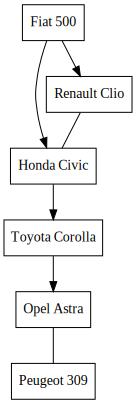

In [79]:
from mcda.relations import *

relations = PreferenceStructure([
    P("Fiat 500", "Honda Civic"),
    P("Toyota Corolla", "Opel Astra"),
    P("Fiat 500", "Renault Clio"),
    P("Honda Civic", "Toyota Corolla"),
    I("Opel Astra", "Peugeot 309"),
    I("Renault Clio", "Honda Civic"),
])
relations.plot()

#### Train a SRMP model

In [80]:
learner = SRMPLearner(
    performance_table,
    relations,
    max_profiles_number=3,
    non_dictator=True,
    gamma=0.01
)
srmp = learner.learn()
srmp.__dict__, learner.fitness

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/nduminy/.pyenv/versions/3.10.7/envs/pymcda-test/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/ce71c2ac984643faae879ad412e8d792-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/ce71c2ac984643faae879ad412e8d792-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 226 COLUMNS
At line 890 RHS
At line 1112 BOUNDS
At line 1193 ENDATA
Problem MODEL has 221 rows, 80 columns and 577 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6 - 0.00 seconds
Cgl0002I 4 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 113 strengthened rows, 6 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 18 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 7 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 

Cbc0014I Cut generator 2 (Knapsack) - 14 row cuts average 5.7 elements, 0 column cuts (0 active)  in 0.003 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 71 row cuts average 11.4 elements, 0 column cuts (0 active)  in 0.003 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 1 row cuts average 2.0 elements, 0 column cuts (0 active)  in 0.002 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 76 row cuts average 38.4 elements, 0 column cuts (0 active)  in 0.002 seconds - new frequency is -100
Cbc0010I After 0 nodes, 1 on tree, -5 best solution, best possible -6 (0.16 seconds)
Cbc0038I Full problem 265 rows 113 columns, reduced to 100 rows 41 columns
Cbc0038I Full problem 265 rows 113 columns, reduced to 91 rows 37 columns
Cbc0038I Full problem 265 rows 113 columns, reduced to 95

({'performance_table': <mcda.core.matrices.PerformanceTable at 0x7fa4a9ee0370>,
  'criteria_weights': {'cost': 0.16333333,
   'fuel consumption': 0.16333333,
   'comfort': 0.01,
   'color': 0.16333333,
   'range': 0.5},
  'profiles': <mcda.core.matrices.PerformanceTable at 0x7fa4a726f9a0>,
  'lexicographic_order': [0, 1]},
 1.0)

In [81]:
srmp.profiles.data

cost  fuel consumption comfort color        range
0  15460.00006              5.18     ***  blue   905.999998
1   6000.00000              4.10    ****   red  1000.000000

In [82]:
rank = srmp.rank()
rank.data

Fiat 500          1
Peugeot 309       4
Renault Clio      2
Opel Astra        4
Honda Civic       2
Toyota Corolla    3
dtype: int64

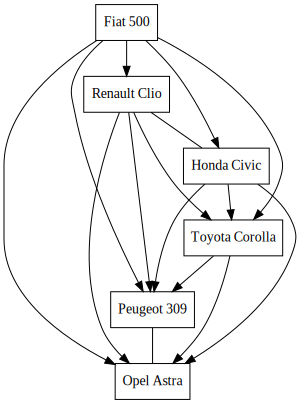

In [83]:
PreferenceStructure.from_ranking(rank).plot()

You can also directly create and train a SRMP object:

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/nduminy/.pyenv/versions/3.10.7/envs/pymcda-test/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/e7f9f14165dc48728cecf7a385a493d0-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/e7f9f14165dc48728cecf7a385a493d0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 226 COLUMNS
At line 890 RHS
At line 1112 BOUNDS
At line 1193 ENDATA
Problem MODEL has 221 rows, 80 columns and 577 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 6 - 0.00 seconds
Cgl0002I 4 variables fixed
Cgl0003I 0 fixed, 0 tightened bounds, 113 strengthened rows, 6 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 18 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 7 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 

Cbc0014I Cut generator 2 (Knapsack) - 14 row cuts average 5.7 elements, 0 column cuts (0 active)  in 0.003 seconds - new frequency is -100
Cbc0014I Cut generator 3 (Clique) - 0 row cuts average 0.0 elements, 0 column cuts (0 active)  in 0.000 seconds - new frequency is -100
Cbc0014I Cut generator 4 (MixedIntegerRounding2) - 71 row cuts average 11.4 elements, 0 column cuts (0 active)  in 0.003 seconds - new frequency is -100
Cbc0014I Cut generator 5 (FlowCover) - 1 row cuts average 2.0 elements, 0 column cuts (0 active)  in 0.002 seconds - new frequency is -100
Cbc0014I Cut generator 6 (TwoMirCuts) - 76 row cuts average 38.4 elements, 0 column cuts (0 active)  in 0.002 seconds - new frequency is -100
Cbc0010I After 0 nodes, 1 on tree, -5 best solution, best possible -6 (0.13 seconds)
Cbc0038I Full problem 265 rows 113 columns, reduced to 100 rows 41 columns
Cbc0038I Full problem 265 rows 113 columns, reduced to 91 rows 37 columns
Cbc0038I Full problem 265 rows 113 columns, reduced to 95

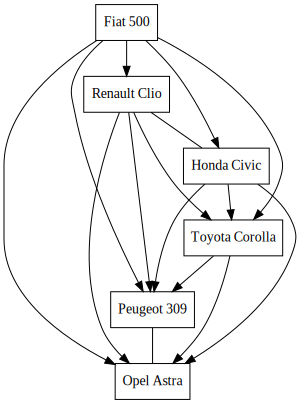

In [84]:
srmp = SRMP.learn(
    performance_table,
    relations,
    max_profiles_number=3,
    non_dictator=True,
    gamma=0.01,
)
rank = srmp.rank()
PreferenceStructure.from_ranking(rank).plot()